In [1]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("C:\ExcelR\Assignments\Assignment 17\SalaryData_Train(1).csv")
test=pd.read_csv("C:\ExcelR\Assignments\Assignment 17\SalaryData_Test(1).csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [5]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='count'>

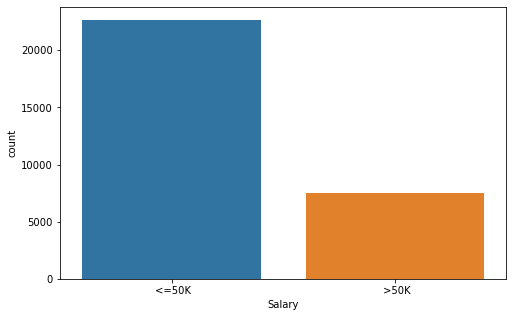

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x=train['Salary'],data=train)

<AxesSubplot:xlabel='Salary', ylabel='count'>

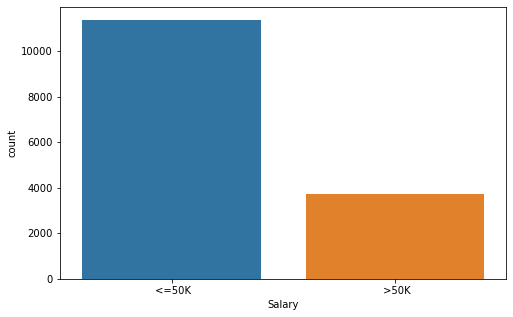

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x=test['Salary'],data=test)

<AxesSubplot:xlabel='sex'>

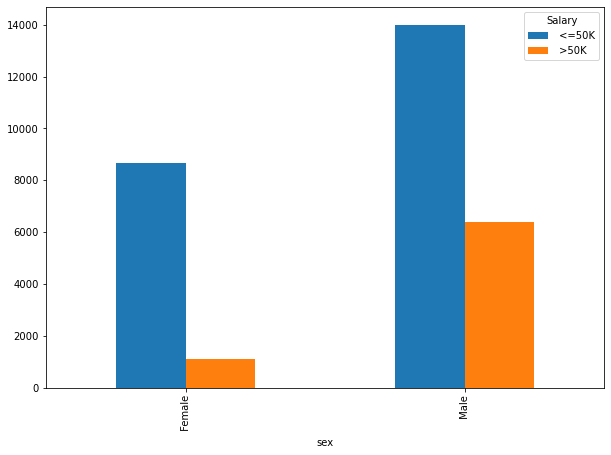

In [9]:
pd.crosstab(train['sex'],train['Salary']).plot(kind='bar',figsize=(10,7))

<AxesSubplot:xlabel='sex'>

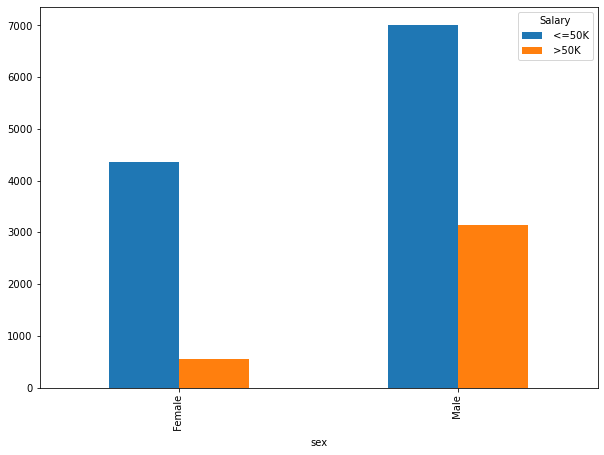

In [10]:
pd.crosstab(test['sex'],test['Salary']).plot(kind='bar',figsize=(10,7))

<AxesSubplot:xlabel='workclass'>

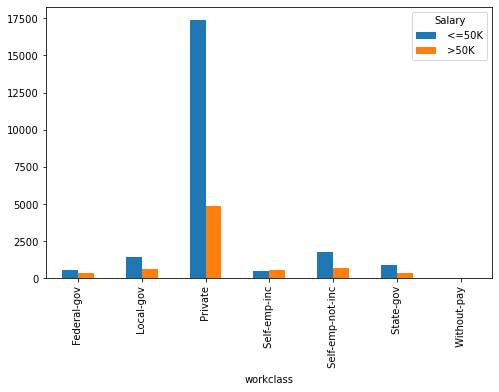

In [11]:
pd.crosstab(train['workclass'],train['Salary']).plot(kind='bar',figsize=(8,5))

<AxesSubplot:xlabel='workclass'>

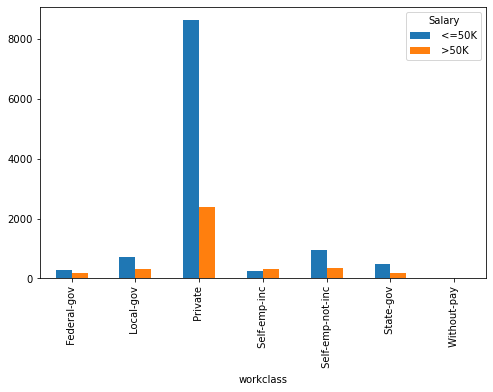

In [12]:
pd.crosstab(test['workclass'],test['Salary']).plot(kind='bar',figsize=(8,5))

In [13]:
obj=['workclass', 'education','maritalstatus','occupation', 'relationship', 'race', 'sex','native', 'Salary']
train[obj]=train[obj].astype('category')
test[obj]=test[obj].astype('category')

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
train[obj]=train[obj].apply(LabelEncoder().fit_transform)
test[obj]=test[obj].apply(LabelEncoder().fit_transform)

In [16]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


##### for algorithm purpose we taking low data

In [17]:
x_train=train.iloc[0:500,0:13]
y_train=train.iloc[0:500,13]
x_test=test.iloc[0:100,0:13]
y_test=test.iloc[0:100,13]

## Algorithm for Best Parameters

In [18]:
clf=SVC()
param_grid=[{'kernel':['rbf'],'gamma':[50,10,5,0.5,0.1],'C':[30,25,20,15,10,0.5,0.1] }]
gsv_rbf=GridSearchCV(clf,param_grid,cv=10)
gsv_rbf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [30, 25, 20, 15, 10, 0.5, 0.1],
                          'gamma': [50, 10, 5, 0.5, 0.1], 'kernel': ['rbf']}])

In [19]:
gsv_rbf.best_params_ , gsv_rbf.best_score_

({'C': 30, 'gamma': 0.5, 'kernel': 'rbf'}, 0.772)

## Model Building With best parameter

In [20]:
x_train=train.iloc[:,0:13]
y_train=train.iloc[:,13]
x_test=test.iloc[:,0:13]
y_test=test.iloc[:,13]

In [21]:
clf = SVC(C=30, gamma=0.5,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 77.17795484727755


array([[10759,   601],
       [ 2836,   864]], dtype=int64)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86     11360
           1       0.59      0.23      0.33      3700

    accuracy                           0.77     15060
   macro avg       0.69      0.59      0.60     15060
weighted avg       0.74      0.77      0.73     15060

